In [96]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import seaborn as sns
from datetime import datetime

# Heat Alert
Toronto Public Health monitors the Heat Health Alert System every day from May 15 to September 30 each year
https://open.toronto.ca/dataset/heat-alerts-and-extreme-heat-alerts/

In [98]:
heat_data_json = [{"id":"262","date":"2018-08-29","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"261","date":"2018-08-28","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"260","date":"2018-08-27","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"259","date":"2018-08-06","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"258","date":"2018-08-05","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"257","date":"2018-07-16","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"256","date":"2018-07-15","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"255","date":"2018-07-05","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"254","date":"2018-07-04","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"253","date":"2018-07-03","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"252","date":"2018-07-02","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"251","date":"2018-07-01","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"250","date":"2018-06-30","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"249","date":"2018-06-29","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"248","date":"2018-06-18","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"247","date":"2018-06-17","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"242","date":"2017-09-26","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"241","date":"2017-09-25","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"240","date":"2017-09-24","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"239","date":"2017-09-23","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"237","date":"2017-06-17","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"235","date":"2017-06-12","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"234","date":"2017-06-11","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"232","date":"2016-09-08","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"231","date":"2016-09-07","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"230","date":"2016-09-06","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"228","date":"2016-08-13","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"227","date":"2016-08-12","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"226","date":"2016-08-11","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"225","date":"2016-08-10","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"224","date":"2016-08-09","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"222","date":"2016-08-05","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"221","date":"2016-08-04","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"219","date":"2016-07-24","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"218","date":"2016-07-23","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"217","date":"2016-07-22","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"216","date":"2016-07-21","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"214","date":"2016-07-14","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"213","date":"2016-07-13","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"212","date":"2016-07-12","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"210","date":"2016-07-07","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"209","date":"2016-07-06","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"208","date":"2016-07-05","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"206","date":"2016-06-20","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"205","date":"2016-06-19","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"203","date":"2015-09-08","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"202","date":"2015-09-07","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"201","date":"2015-09-06","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"200","date":"2015-09-05","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"198","date":"2015-08-17","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"197","date":"2015-08-16","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"195","date":"2015-07-30","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"194","date":"2015-07-29","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"193","date":"2015-07-28","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"192","date":"2015-07-27","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"190","date":"2015-07-19","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"189","date":"2015-07-18","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"187","date":"2014-09-05","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"185","date":"2013-09-11","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"184","date":"2013-09-10","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"182","date":"2013-07-19","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"181","date":"2013-07-18","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"180","date":"2013-07-17","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"179","date":"2013-07-16","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"178","date":"2013-07-15","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"176","date":"2013-06-26","code":"EHAD","text":"Toronto's Medical Officer of Health has downgraded the Extreme Heat Warning to a Heat Warning"},{"id":"175","date":"2013-06-25","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"174","date":"2013-06-24","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"173","date":"2013-06-23","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"171","date":"2013-05-31","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"170","date":"2013-05-30","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"168","date":"2012-08-31","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"166","date":"2012-08-04","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"164","date":"2012-08-02","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"162","date":"2012-07-23","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"160","date":"2012-07-18","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"159","date":"2012-07-17","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"158","date":"2012-07-16","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"156","date":"2012-07-14","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"155","date":"2012-07-13","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"154","date":"2012-07-12","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"152","date":"2012-07-06","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"151","date":"2012-07-05","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"150","date":"2012-07-04","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"149","date":"2012-07-03","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"147","date":"2012-06-30","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"146","date":"2012-06-29","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"145","date":"2012-06-28","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"143","date":"2012-06-21","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"142","date":"2012-06-20","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"141","date":"2012-06-19","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"139","date":"2012-05-28","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"137","date":"2011-09-03","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"135","date":"2011-08-01","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"133","date":"2011-07-24","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"132","date":"2011-07-23","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"131","date":"2011-07-22","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"130","date":"2011-07-21","code":"EHAE","text":"Toronto's Medical Officer of Health has continued the Extended Heat Warning for today"},{"id":"129","date":"2011-07-20","code":"HAU","text":"Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning"},{"id":"128","date":"2011-07-19","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"126","date":"2011-07-17","code":"HAE","text":"Toronto's Medical Officer of Health has continued the Heat Warning for today"},{"id":"125","date":"2011-07-16","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"123","date":"2011-06-08","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"121","date":"2011-05-31","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"119","date":"2010-09-02","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"118","date":"2010-09-01","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"117","date":"2010-08-31","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"116","date":"2010-08-30","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"115","date":"2010-08-29","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"114","date":"2010-07-08","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"113","date":"2010-07-07","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"112","date":"2010-07-06","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"111","date":"2010-07-05","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"110","date":"2010-07-04","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"109","date":"2010-05-31","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"108","date":"2010-05-30","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"107","date":"2010-05-27","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"106","date":"2010-05-26","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"105","date":"2010-05-25","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"104","date":"2010-05-24","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"103","date":"2009-08-17","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"102","date":"2009-06-25","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"101","date":"2009-06-24","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"100","date":"2008-08-23","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"99","date":"2008-07-18","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"98","date":"2008-07-17","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"97","date":"2008-07-16","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"96","date":"2008-07-08","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"95","date":"2008-07-07","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"94","date":"2008-07-02","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"93","date":"2008-06-09","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"92","date":"2008-06-08","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"91","date":"2007-08-06","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"90","date":"2007-08-03","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"89","date":"2007-08-02","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"88","date":"2007-08-01","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"87","date":"2007-07-31","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"86","date":"2007-07-09","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"85","date":"2007-07-08","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"84","date":"2007-06-27","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"83","date":"2007-06-26","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"82","date":"2007-06-25","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"81","date":"2007-06-13","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"80","date":"2007-06-12","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"79","date":"2007-06-01","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"78","date":"2007-05-31","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"77","date":"2007-05-24","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"76","date":"2006-08-02","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"75","date":"2006-08-01","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"74","date":"2006-07-31","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"73","date":"2006-07-30","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"72","date":"2006-07-29","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"71","date":"2006-07-27","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"70","date":"2006-07-26","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"69","date":"2006-07-17","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"68","date":"2006-07-16","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"67","date":"2006-07-03","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"66","date":"2006-07-02","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"65","date":"2006-06-22","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"64","date":"2006-06-18","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"63","date":"2006-06-17","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"62","date":"2006-05-31","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"61","date":"2006-05-30","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"60","date":"2006-05-29","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"59","date":"2005-08-08","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"58","date":"2005-08-05","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"57","date":"2005-08-04","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"56","date":"2005-08-02","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"55","date":"2005-07-18","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"54","date":"2005-07-17","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"53","date":"2005-07-16","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"52","date":"2005-07-15","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"51","date":"2005-07-14","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"50","date":"2005-07-13","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"49","date":"2005-07-12","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"48","date":"2005-07-11","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"47","date":"2005-07-10","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"46","date":"2005-06-30","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"45","date":"2005-06-29","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"44","date":"2005-06-28","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"43","date":"2005-06-27","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"42","date":"2005-06-25","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"41","date":"2005-06-14","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"40","date":"2005-06-13","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"39","date":"2005-06-12","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"38","date":"2005-06-11","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"37","date":"2005-06-10","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"36","date":"2005-06-09","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"35","date":"2005-06-07","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"34","date":"2005-06-06","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"33","date":"2004-07-09","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"32","date":"2004-07-08","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"31","date":"2003-07-04","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"30","date":"2003-07-03","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"29","date":"2003-06-26","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"28","date":"2003-06-25","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"27","date":"2003-06-24","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"26","date":"2003-06-23","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"25","date":"2002-08-14","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"24","date":"2002-08-13","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"23","date":"2002-08-12","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"22","date":"2002-08-11","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"21","date":"2002-08-01","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"20","date":"2002-07-29","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"19","date":"2002-07-28","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"18","date":"2002-07-22","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"17","date":"2002-07-21","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"16","date":"2002-07-17","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"15","date":"2002-07-16","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"14","date":"2002-07-15","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"13","date":"2002-07-08","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"12","date":"2002-07-03","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"11","date":"2002-07-02","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"10","date":"2002-07-01","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"9","date":"2001-08-09","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"8","date":"2001-08-08","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"7","date":"2001-08-07","code":"EHA","text":"Toronto's Medical Officer of Health has issued an Extended Heat Warning"},{"id":"6","date":"2001-08-06","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"5","date":"2001-07-24","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"4","date":"2001-07-23","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"3","date":"2001-06-30","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"2","date":"2001-06-29","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"},{"id":"1","date":"2001-06-15","code":"HA","text":"Toronto's Medical Officer of Health has issued a Heat Warning"}]

In [99]:
heat_data_df = pd.DataFrame(heat_data_json)
heat_data_df.head()

,id,date,code,text
0,262,2018-08-29,EHA,Toronto's Medical Officer of Health has issued...
1,261,2018-08-28,HA,Toronto's Medical Officer of Health has issued...
2,260,2018-08-27,HA,Toronto's Medical Officer of Health has issued...
3,259,2018-08-06,HA,Toronto's Medical Officer of Health has issued...
4,258,2018-08-05,HA,Toronto's Medical Officer of Health has issued...


In [119]:
heat_data_df.shape

(223, 6)

In [101]:
heat_data_df['text'].unique()

array(["Toronto's Medical Officer of Health has issued an Extended Heat Warning",
       "Toronto's Medical Officer of Health has issued a Heat Warning",
       "Toronto's Medical Officer of Health has continued the Extended Heat Warning for today",
       "Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning",
       "Toronto's Medical Officer of Health has continued the Heat Warning for today",
       "Toronto's Medical Officer of Health has downgraded the Extreme Heat Warning to a Heat Warning"],
      dtype=object)

In [135]:
heat_data_df[['text', 'code']].drop_duplicates()

,text,code
0,Toronto's Medical Officer of Health has issued...,EHA
1,Toronto's Medical Officer of Health has issued...,HA
7,Toronto's Medical Officer of Health has contin...,EHAE
17,Toronto's Medical Officer of Health has upgrad...,HAU
18,Toronto's Medical Officer of Health has contin...,HAE
65,Toronto's Medical Officer of Health has downgr...,EHAD


In [102]:
heat_data_df['date'] = pd.to_datetime(heat_data_df['date'])
heat_df = heat_data_df[heat_data_df['date'].dt.year >= 2017]
heat_df.shape

(23, 4)

In [131]:
heat_df['text'].unique()

array(["Toronto's Medical Officer of Health has issued an Extended Heat Warning",
       "Toronto's Medical Officer of Health has issued a Heat Warning",
       "Toronto's Medical Officer of Health has continued the Extended Heat Warning for today",
       "Toronto's Medical Officer of Health has upgraded the Heat Warning to an Extended Heat Warning",
       "Toronto's Medical Officer of Health has continued the Heat Warning for today"],
      dtype=object)

/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_62532/3835242507.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  heat_monthly_counts = heat_df.resample('M', on='date').size()
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_62532/3835242507.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  heat_monthly_counts = filtered_df.resample('M', on='date').size()
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_62532/3835242507.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  heat_monthly_counts = filtered_df.resample('M', on='date').size()
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_62532/3835242507.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  heat_monthly_counts = filtered_df.resample('M', on='date').size()
/var/

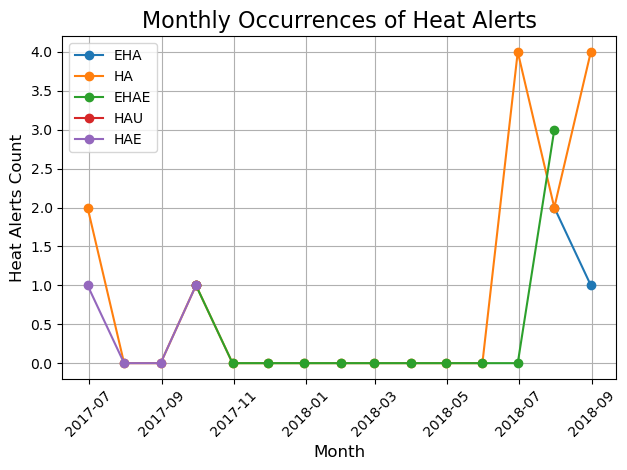

In [129]:
heat_monthly_counts = heat_df.resample('M', on='date').size()

heat_unique_codes = heat_df['code'].unique()
plt.figure()

for code_class in heat_unique_codes:
    filtered_df = heat_df[heat_df['code'] == code_class]
    
    # Resample by month and count occurrences
    heat_monthly_counts = filtered_df.resample('M', on='date').size()
    
    # Plot the resampled data
    plt.plot(heat_monthly_counts.index, heat_monthly_counts.values, label=code_class, marker='o', linestyle='-')

# Set title and labels

plt.title('Monthly Occurrences of Heat Alerts', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Heat Alerts Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_62532/3287436256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_df['year'] = heat_df['date'].dt.year
/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_62532/3287436256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_df['month'] = heat_df['date'].dt.month


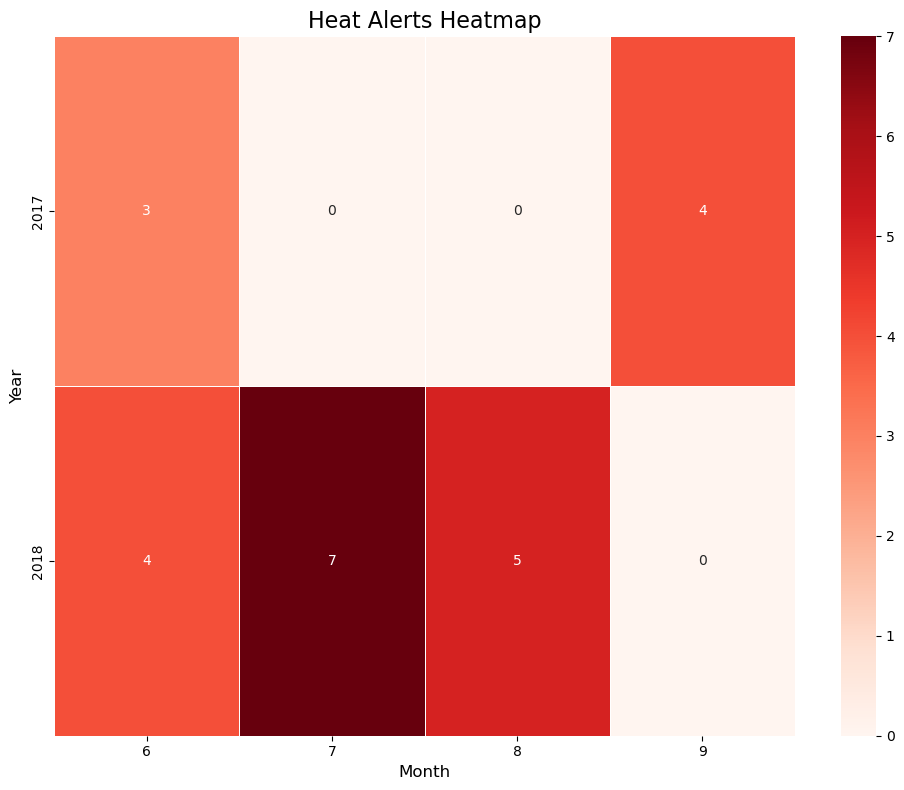

In [137]:
heat_df['year'] = heat_df['date'].dt.year
heat_df['month'] = heat_df['date'].dt.month

heat_monthly_counts = heat_df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heat_monthly_counts, cmap="Reds", annot=True, fmt="d", linewidths=.5)

plt.title('Heat Alerts Heatmap', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

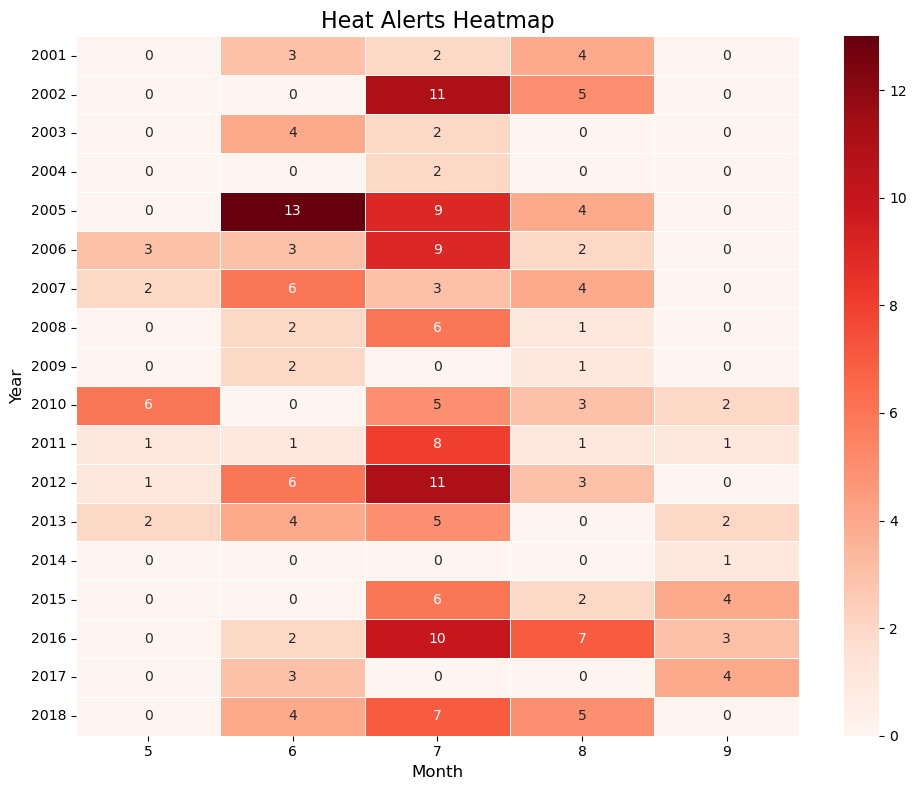

In [123]:
heat_data_df['year'] = heat_data_df['date'].dt.year
heat_data_df['month'] = heat_data_df['date'].dt.month

heat_full_monthly_counts = heat_data_df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(heat_full_monthly_counts, cmap="Reds", annot=True, fmt="d", linewidths=.5)

plt.title('Heat Alerts Heatmap', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Cold Alert
An Extreme Cold Weather Alert is issued for southern Ontario (including Toronto) when the temperature or wind chill is forecasted to reach minus 30°C for at least two hours.
https://www.toronto.ca/city-government/data-research-maps/research-reports/housing-and-homelessness-research-and-reports/statistics-on-extreme-cold-weather-alerts-in-toronto/ 

In [39]:
dates_data = {
    2017: {
        "January": [5, 6, 7, 8],
        "February": [2, 3, 8, 9],
        "March": [3, 4, 10, 11, 12, 13, 14, 15, 21],
        "November": [9],
        "December": [12, 13, 14, 16, 25, 26, 27, 28, 29, 30, 31]
    },
    2018: {
        "January": [1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 29],
        "February": [1, 2, 3, 4, 5, 7, 8, 12],
        "November": [21]
    },
    2019: {
        "January": [10, 12, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 31],
        "February": [1, 8, 11, 12, 18, 25, 27],
        "March": [3, 4, 5, 6, 7],
        "November": [12, 13, 15, 16],
        "December": [18, 19, 20],
    }
}

rows = []

month_map = {
    "January": 1,
    "February": 2,
    "March": 3,
    "November": 11,
    "December": 12
}

id_counter = 1
for year, months in dates_data.items():
    for month, days in months.items():
        for day in days:
            date_str = f"{year}-{month_map[month]:02d}-{day:02d}"
            rows.append([id_counter, date_str, "CA"])
            id_counter += 1

cold_df = pd.DataFrame(rows, columns=["id", "date", "code"])
cold_df['date'] = pd.to_datetime(cold_df['date'])

cold_df.head()

,id,date,code
0,1,2017-01-05,CA
1,2,2017-01-06,CA
2,3,2017-01-07,CA
3,4,2017-01-08,CA
4,5,2017-02-02,CA


/var/folders/h1/_4zg6g_d4tzgy2qpqxx2jn580000gn/T/ipykernel_62532/459937205.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cold_monthly_counts = cold_df.resample('M', on='date').size()


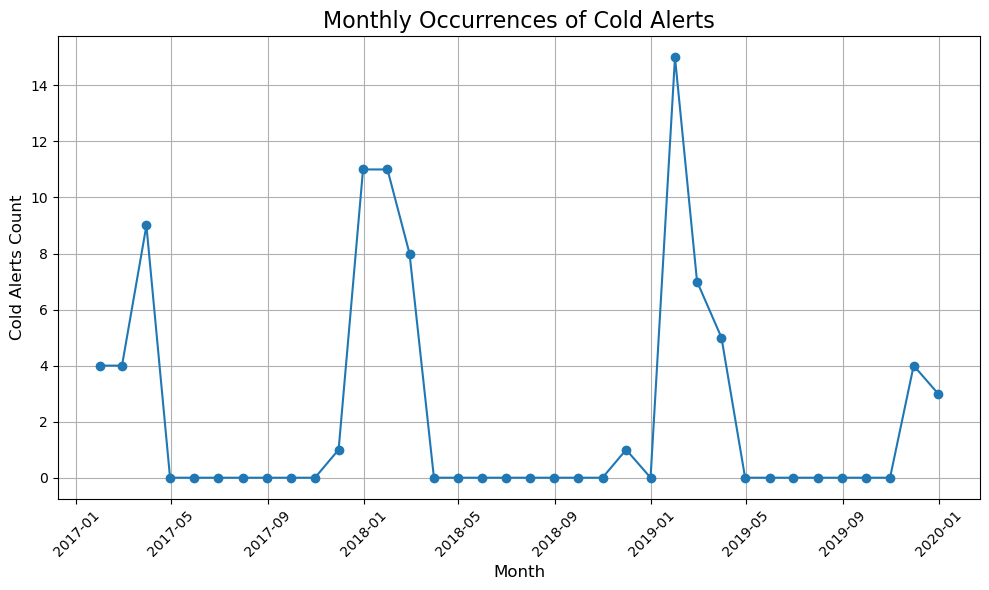

In [53]:
cold_monthly_counts = cold_df.resample('M', on='date').size()

plt.figure(figsize=(10,6))
plt.plot(cold_monthly_counts.index, cold_monthly_counts.values, marker='o', linestyle='-')

plt.title('Monthly Occurrences of Cold Alerts', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cold Alerts Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

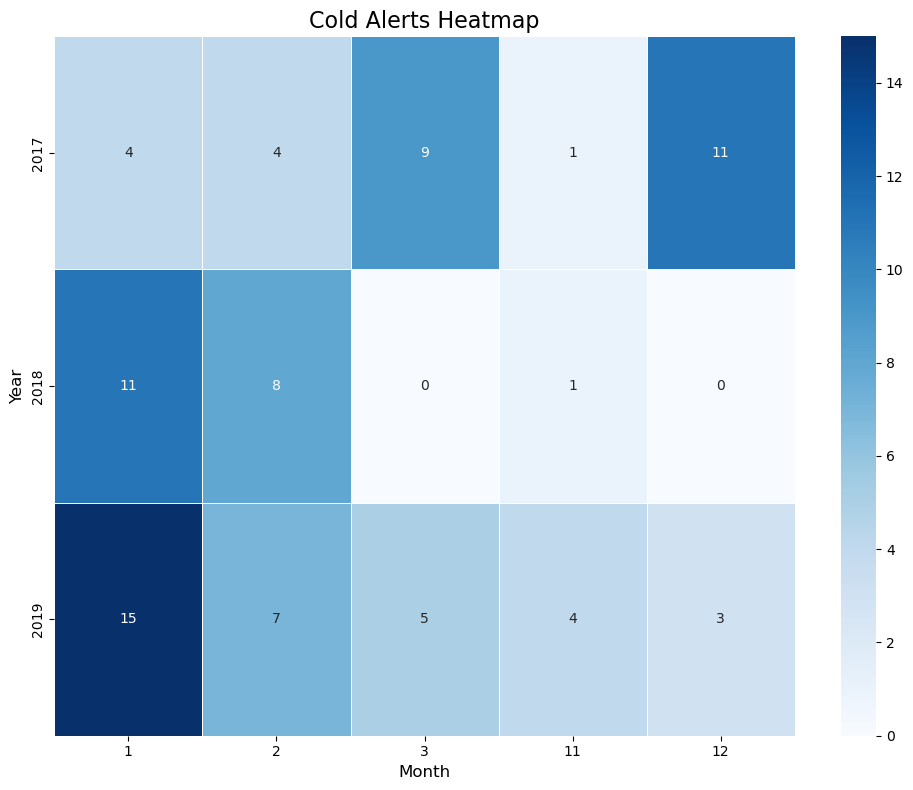

In [115]:
cold_df['year'] = cold_df['date'].dt.year
cold_df['month'] = cold_df['date'].dt.month

cold_monthly_counts = cold_df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(cold_monthly_counts, cmap="Blues", annot=True, fmt="d", linewidths=.5)

plt.title('Cold Alerts Heatmap', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Merged dataframe and output csv file

In [142]:
heat_df.head()

,id,date,code,text,year,month
0,262,2018-08-29,EHA,Toronto's Medical Officer of Health has issued...,2018,8
1,261,2018-08-28,HA,Toronto's Medical Officer of Health has issued...,2018,8
2,260,2018-08-27,HA,Toronto's Medical Officer of Health has issued...,2018,8
3,259,2018-08-06,HA,Toronto's Medical Officer of Health has issued...,2018,8
4,258,2018-08-05,HA,Toronto's Medical Officer of Health has issued...,2018,8


In [144]:
cold_df.head()

,id,date,code,year,month
0,1,2017-01-05,CA,2017,1
1,2,2017-01-06,CA,2017,1
2,3,2017-01-07,CA,2017,1
3,4,2017-01-08,CA,2017,1
4,5,2017-02-02,CA,2017,2


In [148]:
df_extreme_weather = pd.concat([heat_df, cold_df], ignore_index=True)
df_extreme_weather['id'] = range(1, len(df_extreme_weather) + 1)
df_extreme_weather.head()

,id,date,code,text,year,month
0,1,2018-08-29,EHA,Toronto's Medical Officer of Health has issued...,2018,8
1,2,2018-08-28,HA,Toronto's Medical Officer of Health has issued...,2018,8
2,3,2018-08-27,HA,Toronto's Medical Officer of Health has issued...,2018,8
3,4,2018-08-06,HA,Toronto's Medical Officer of Health has issued...,2018,8
4,5,2018-08-05,HA,Toronto's Medical Officer of Health has issued...,2018,8


In [150]:
df_extreme_weather.shape

(106, 6)

In [160]:
# because cold_df was created, it does not any content for text column, I am just going to fill it with 'no text'
df_extreme_weather['text'] = df_extreme_weather['text'].fillna('No text')

In [164]:
df_extreme_weather.to_csv('df_extreme_weather.csv', index = False)

In [166]:
from IPython.display import FileLink
FileLink('df_extreme_weather.csv')

/Users/audreytian/MIE368/df_extreme_weather.csv